**Загрузите набор данных о домах и набор данных об ирисах.**

In [34]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
import numpy as np
from sklearn import datasets
import seaborn as sns
import matplotlib.pyplot as plt

In [35]:
boston_df = pd.read_csv('BostonHousing.csv')
iris =  datasets.load_iris()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['target'] = iris.target
print(boston_df.head())
print(iris_df.head())

      crim    zn  indus  chas    nox     rm   age     dis  rad  tax  ptratio  \
0  0.00632  18.0   2.31     0  0.538  6.575  65.2  4.0900    1  296     15.3   
1  0.02731   0.0   7.07     0  0.469  6.421  78.9  4.9671    2  242     17.8   
2  0.02729   0.0   7.07     0  0.469  7.185  61.1  4.9671    2  242     17.8   
3  0.03237   0.0   2.18     0  0.458  6.998  45.8  6.0622    3  222     18.7   
4  0.06905   0.0   2.18     0  0.458  7.147  54.2  6.0622    3  222     18.7   

        b  lstat  medv  
0  396.90   4.98  24.0  
1  396.90   9.14  21.6  
2  392.83   4.03  34.7  
3  394.63   2.94  33.4  
4  396.90   5.33  36.2  
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1               

In [36]:
boston_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  b        506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 55.5 KB


In [37]:
iris_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   sepal length (cm)  150 non-null    float64
 1   sepal width (cm)   150 non-null    float64
 2   petal length (cm)  150 non-null    float64
 3   petal width (cm)   150 non-null    float64
 4   target             150 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 6.0 KB


<Axes: ylabel='target'>

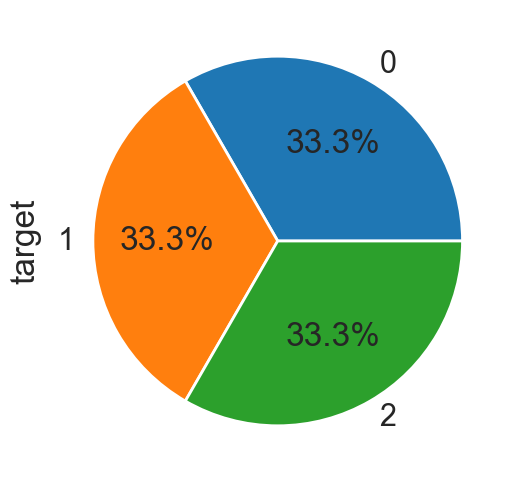

In [38]:
sns.set_style('darkgrid')
sns.set_context('poster')
plt.rcParams['figure.figsize'] = [8,6]
iris_df.groupby('target').size().plot(kind='pie',\
y = "target",\
label = "target",\
autopct='%1.1f%%')

In [39]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
X_train, X_test, y_train, y_test = train_test_split(iris.data, iris.target, test_size=0.35, random_state=42)
# Нормализовать данные
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
model = LogisticRegression()
model.fit(X_train_scaled, y_train)
y_pred = model.predict(X_test_scaled)
y_pred_train = model.predict(X_train_scaled)
accuracy = model.score(X_test_scaled, y_test)
print("Accuracy:", accuracy)
print("Classification Report (Test):")
print(classification_report(y_test, y_pred))
print("Classification Report (Train):")
print(classification_report(y_train, y_pred_train))


Accuracy: 0.9811320754716981
Classification Report (Test):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        19
           1       0.94      1.00      0.97        17
           2       1.00      0.94      0.97        17

    accuracy                           0.98        53
   macro avg       0.98      0.98      0.98        53
weighted avg       0.98      0.98      0.98        53

Classification Report (Train):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        31
           1       1.00      0.91      0.95        33
           2       0.92      1.00      0.96        33

    accuracy                           0.97        97
   macro avg       0.97      0.97      0.97        97
weighted avg       0.97      0.97      0.97        97



Очень высокая точность классификации (всегда бы так)

In [40]:
from sklearn.metrics import mean_squared_error, r2_score,mean_absolute_error

X = pd.DataFrame(boston_df.drop('medv', axis=1))  # Ваш новый датасет
y= pd.Series(boston_df['medv'])
 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Масштабирование признаков

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_boston = LinearRegression()
model_boston.fit(X_train_scaled, y_train)
# Предсказания на тестовом наборе
y_pred_test = model_boston.predict(X_test_scaled)

# Предсказания на обучающем наборе
y_pred_train = model_boston.predict(X_train_scaled)


# Оценка метрик на тестовом наборе
mse_test = mean_squared_error(y_test, y_pred_test)
rmse_test = np.sqrt(mse_test)
r2_test = r2_score(y_test, y_pred_test)
mae_test = mean_absolute_error(y_test, y_pred_test)


# Оценка метрик на обучающем наборе
mse_train = mean_squared_error(y_train, y_pred_train)
rmse_train = np.sqrt(mse_train)
r2_train = r2_score(y_train, y_pred_train)
mae_train = mean_absolute_error(y_train, y_pred_train)


# Вывод результатов на тестовом наборе
print("Метрики на тестовом наборе:")
print(f"Mean Squared Error: {mse_test}")
print(f"RMSE: {rmse_test}")
print(f"R^2 Score: {r2_test}")
print(f"Mean Absolute Error: {mae_test}")

# Вывод результатов на обучающем наборе
print("\nМетрики на обучающем наборе:")
print(f"Mean Squared Error: {mse_train}")
print(f"RMSE: {rmse_train}")
print(f"R^2 Score: {r2_train}")
print(f"Mean Absolute Error: {mae_train}")

Метрики на тестовом наборе:
Mean Squared Error: 24.291119474973513
RMSE: 4.928602182665336
R^2 Score: 0.668759493535632
Mean Absolute Error: 3.1890919658878465

Метрики на обучающем наборе:
Mean Squared Error: 21.641412753226312
RMSE: 4.6520331848801675
R^2 Score: 0.7508856358979673
Mean Absolute Error: 3.31477162678323


Модель слегка переобучена, возможно требуется нормализация и натсройка макро параметров

In [41]:
boston_df.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


    Mean Squared Error (MSE):
        Значение MSE = 24.29. Это среднее значение квадратов ошибок предсказаний. Поскольку это значение в квадрате, его трудно интерпретировать в контексте исходных данных.

    Root Mean Squared Error (RMSE):
        Значение RMSE = 4.93. Это корень из MSE и дает представление о средней ошибке предсказаний в тех же единицах, что и целевая переменная (цены на жилье). В два раза меньше чем среднеквадратичное отклонение, значит модель скорее работает чем наоборот

    R^2 Score:
        Значение R² = 0.67. Это коэффициент детерминации, который показывает, какая доля вариации в целевой переменной объясняется моделью. Значение 0.67 означает, что 67% вариации в ценах на жилье объясняется выбранными признаками. Значение R² может варьироваться от 0 до 1, где 1 означает идеальное соответствие.

    Mean Absolute Error (MAE):
        Значение MAE = 3.19. Это среднее значение абсолютных ошибок предсказаний. MAE также интерпретируется в тех же единицах, что и целевая переменная, и показывает, насколько в среднем предсказания отклоняются от истинных значений.

    В целом - не плохо
